#Anomaly Detection Using Random Forest Notebook

#Initializing the process

In [ ]:
# load and summarize the dataset
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
# load the dataset
url = '/content/drive/MyDrive/Projet M&A/csv files/Ultimate_Dataset.csv'
df = read_csv(url)
dataexp = read_csv(url)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Handling dataset issues

In [ ]:
dataexp2=pd.get_dummies(dataexp)
indexes = []
j = 0
for i in list(dataexp2.isnull().sum(axis=1)):
  if i>10:
    indexes.append(j)
  j=j+1
print(len(indexes))
dataexp2 = dataexp2.drop(labels=indexes, axis=0)
#data_R = data_R.drop(labels=indexes, axis=0)
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
dataexp2 = pd.DataFrame(imputer.fit_transform(dataexp2),columns = dataexp2.columns)


631


In [ ]:
dataexp2.shape

(2651, 4435)

In [ ]:
dataexp2.head()

,Unnamed: 0,Index,Date,Deal Value,stockPrice_year-1,stockPrice_year,stockPrice_year+1,earningsPerShare_year-1,earningsPerShare_year,earningsPerShare_year+1,debtEquityRatio_year-1,debtEquityRatio_year,debtEquityRatio_year+1,netProfitMargin_year-1,netProfitMargin_year,netProfitMargin_year+1,inventoryTurnover_year-1,inventoryTurnover_year,inventoryTurnover_year+1,currentRatio_year-1,currentRatio_year,currentRatio_year+1,addTotalDebt_year-1,addTotalDebt_year,addTotalDebt_year+1,enterpriseValue_year-1,enterpriseValue_year,enterpriseValue_year+1,"Target_0-In Design Automation, Inc.","Target_1-800-Contacts, Inc.",Target_10-K Wizard Technology LLC,Target_100 Federal Street Property,Target_125 West 55th Street,Target_17 State-Of-The-Art Next Generation Communities,"Target_1st Global, Inc.","Target_1st United Bancorp, Inc.","Target_20/20 Software, Inc.",Target_21st Century Insurance Group,"Target_24/7 Media, Inc.",Target_360 Networks Corp.,...,"Inv_Volution Group plc, Fleming Way, Crawley, RH10 9YX, United Kingdom, +44 1293 441662, www.volutiongroupplc.com","Inv_W.W. Grainger, Inc., 100 Grainger Parkway, Lake Forest, Illinois, 60045, United States, (847) 535-1000, www.grainger.com","Inv_WPP plc, Sea Containers 18 Upper Ground, London, SE1 9GL, United Kingdom, +44 20 7282 4600, www.wpp.com","Inv_Walmart Inc., 702 SW 8th Street, Bentonville, Arkansas, 72716, United States, (479) 273-4000, www.walmart.com","Inv_Warburg Pincus LLC (PE), 450 Lexington Avenue, New York, New York, 10017, United States, (212)878-0600, www.warburgpincus.com\nIllumina, Inc., 5200 Illumina Way, San Diego, California, 92122, United States, (858) 202-4500, www.illumina.com","Inv_Washington Federal, Inc., 425 Pike Street, Seattle, Washington, 98101, United States, (206) 624-7930, www.washingtonfederal.com","Inv_Waste Connections, Inc., 3 Waterway Square Place, Suite 110, The Woodlands, Texas, 77380, United States, (832) 442-2200, www.wasteconnections.com","Inv_Watsco, Inc., 2665 South Bayshore Drive, Suite 901, Miami, Florida, 33133, United States, (305) 714-4100, www.watsco.com","Inv_Watts Water Technologies, Inc., 815 Chestnut Street, North Andover, Massachusetts, 01845, United States, (978) 688-1811, www.watts.com","Inv_Welbilt, Inc., 2227 Welbilt Boulevard, New Port Richey, Florida, 34655, United States, (727) 375-7010, www.welbilt.com","Inv_Welltower Inc., 4500 Dorr Street, Toledo, Ohio, 43615, United States, (419) 247-2800, www.welltower.com","Inv_Welltower Inc., 4500 Dorr Street, Toledo, Ohio, 43615, United States, (419) 247-2800, www.welltower.com\nMainstreet Property Group, LLC, 14390 Clay Terrace Boulevard Suite 205, Carmel,, Indiana, 46032, United States, (317)582-6200, www.mainstreetinvestment.com","Inv_WesBanco, Inc., 1 Bank Plaza, Wheeling, West Virginia, 26003, United States, (304) 234-9000, www.wesbanco.com","Inv_Western Energy Services Corp., 215, 9th Avenue SW Suite 1700, Calgary, Alberta, T2P 1K3, Canada, (403) 984-5916, www.wesc.ca","Inv_William Lyon Homes, 4695 MacArthur Court, 8th Floor, Newport Beach, California, 92660, United States, (949) 833-3600, www.lyonhomes.com","Inv_Williams-Sonoma, Inc., 3250 Van Ness Avenue, San Francisco, California, 94109, United States, (415) 421-7900, www.williams-sonomainc.com","Inv_Wix.com Ltd., 40 Namal Tel Aviv Street, Tel Aviv, 6350671, Israel, 972 3 545 4900, www.wix.com","Inv_Wolters Kluwer N.V., Zuidpoolsingel 2 P.O. Box 1030, Alphen A D Rijn, 2400 BA, Netherlands, 31 172 641 400, www.wolterskluwer.com","Inv_Woodward, Inc., 1081 Woodward Way, Fort Collins, Colorado, 80525, United States, (970) 482-5811, www.woodward.com","Inv_Workday, Inc., 6110 Stoneridge Mall Road, Pleasanton, California, 94588, United States, (925) 951-9000, www.workday.com","Inv_Wright Medical Group N.V., Prins Bernhardplein 200, Amsterdam, 1097 JB, Netherlands, +31 20 521 4777, www.wright.com","Inv_Wright Medical Group, Inc., 5677 Airline Road, Arlington, Tennessee, 38002, United States","Inv_Wyndham Destinations, Inc., 6277 Sea Harbo

#Detecting Anomalies and Anomaly Scores with IsolationForest






In [ ]:
from sklearn.ensemble import IsolationForest
model=IsolationForest(n_estimators=555, contamination=float(0.2),max_features=1.0)

In [ ]:
dataexp2['Anomaly']=model.fit_predict(dataexp2[['stockPrice_year-1','stockPrice_year','earningsPerShare_year-1','earningsPerShare_year','debtEquityRatio_year-1','debtEquityRatio_year','netProfitMargin_year-1','netProfitMargin_year','inventoryTurnover_year-1','inventoryTurnover_year','currentRatio_year-1','currentRatio_year','addTotalDebt_year-1','addTotalDebt_year','enterpriseValue_year-1','enterpriseValue_year']])
dataexp2['scores']=model.decision_function(dataexp2[['stockPrice_year-1','stockPrice_year','earningsPerShare_year-1','earningsPerShare_year','debtEquityRatio_year-1','debtEquityRatio_year','netProfitMargin_year-1','netProfitMargin_year','inventoryTurnover_year-1','inventoryTurnover_year','currentRatio_year-1','currentRatio_year','addTotalDebt_year-1','addTotalDebt_year','enterpriseValue_year-1','enterpriseValue_year']])

In [ ]:
dataexp2["Anomaly"].value_counts()

 1    2121
-1     530
Name: Anomaly, dtype: int64

In [ ]:
print(dataexp2['Anomaly'])
print(dataexp2['scores'])

0       1
1      -1
2      -1
3       1
4       1
       ..
2646    1
2647    1
2648   -1
2649    1
2650    1
Name: Anomaly, Length: 2651, dtype: int64
0       0.036783
1      -0.214629
2      -0.001724
3       0.004801
4       0.004801
          ...   
2646    0.032688
2647    0.008137
2648   -0.130494
2649    0.020203
2650    0.030103
Name: scores, Length: 2651, dtype: float64


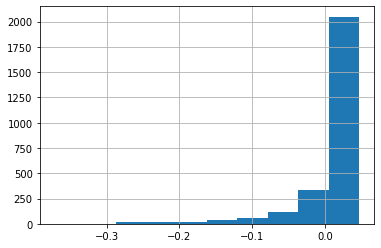

In [ ]:
dataexp2['scores'].hist()

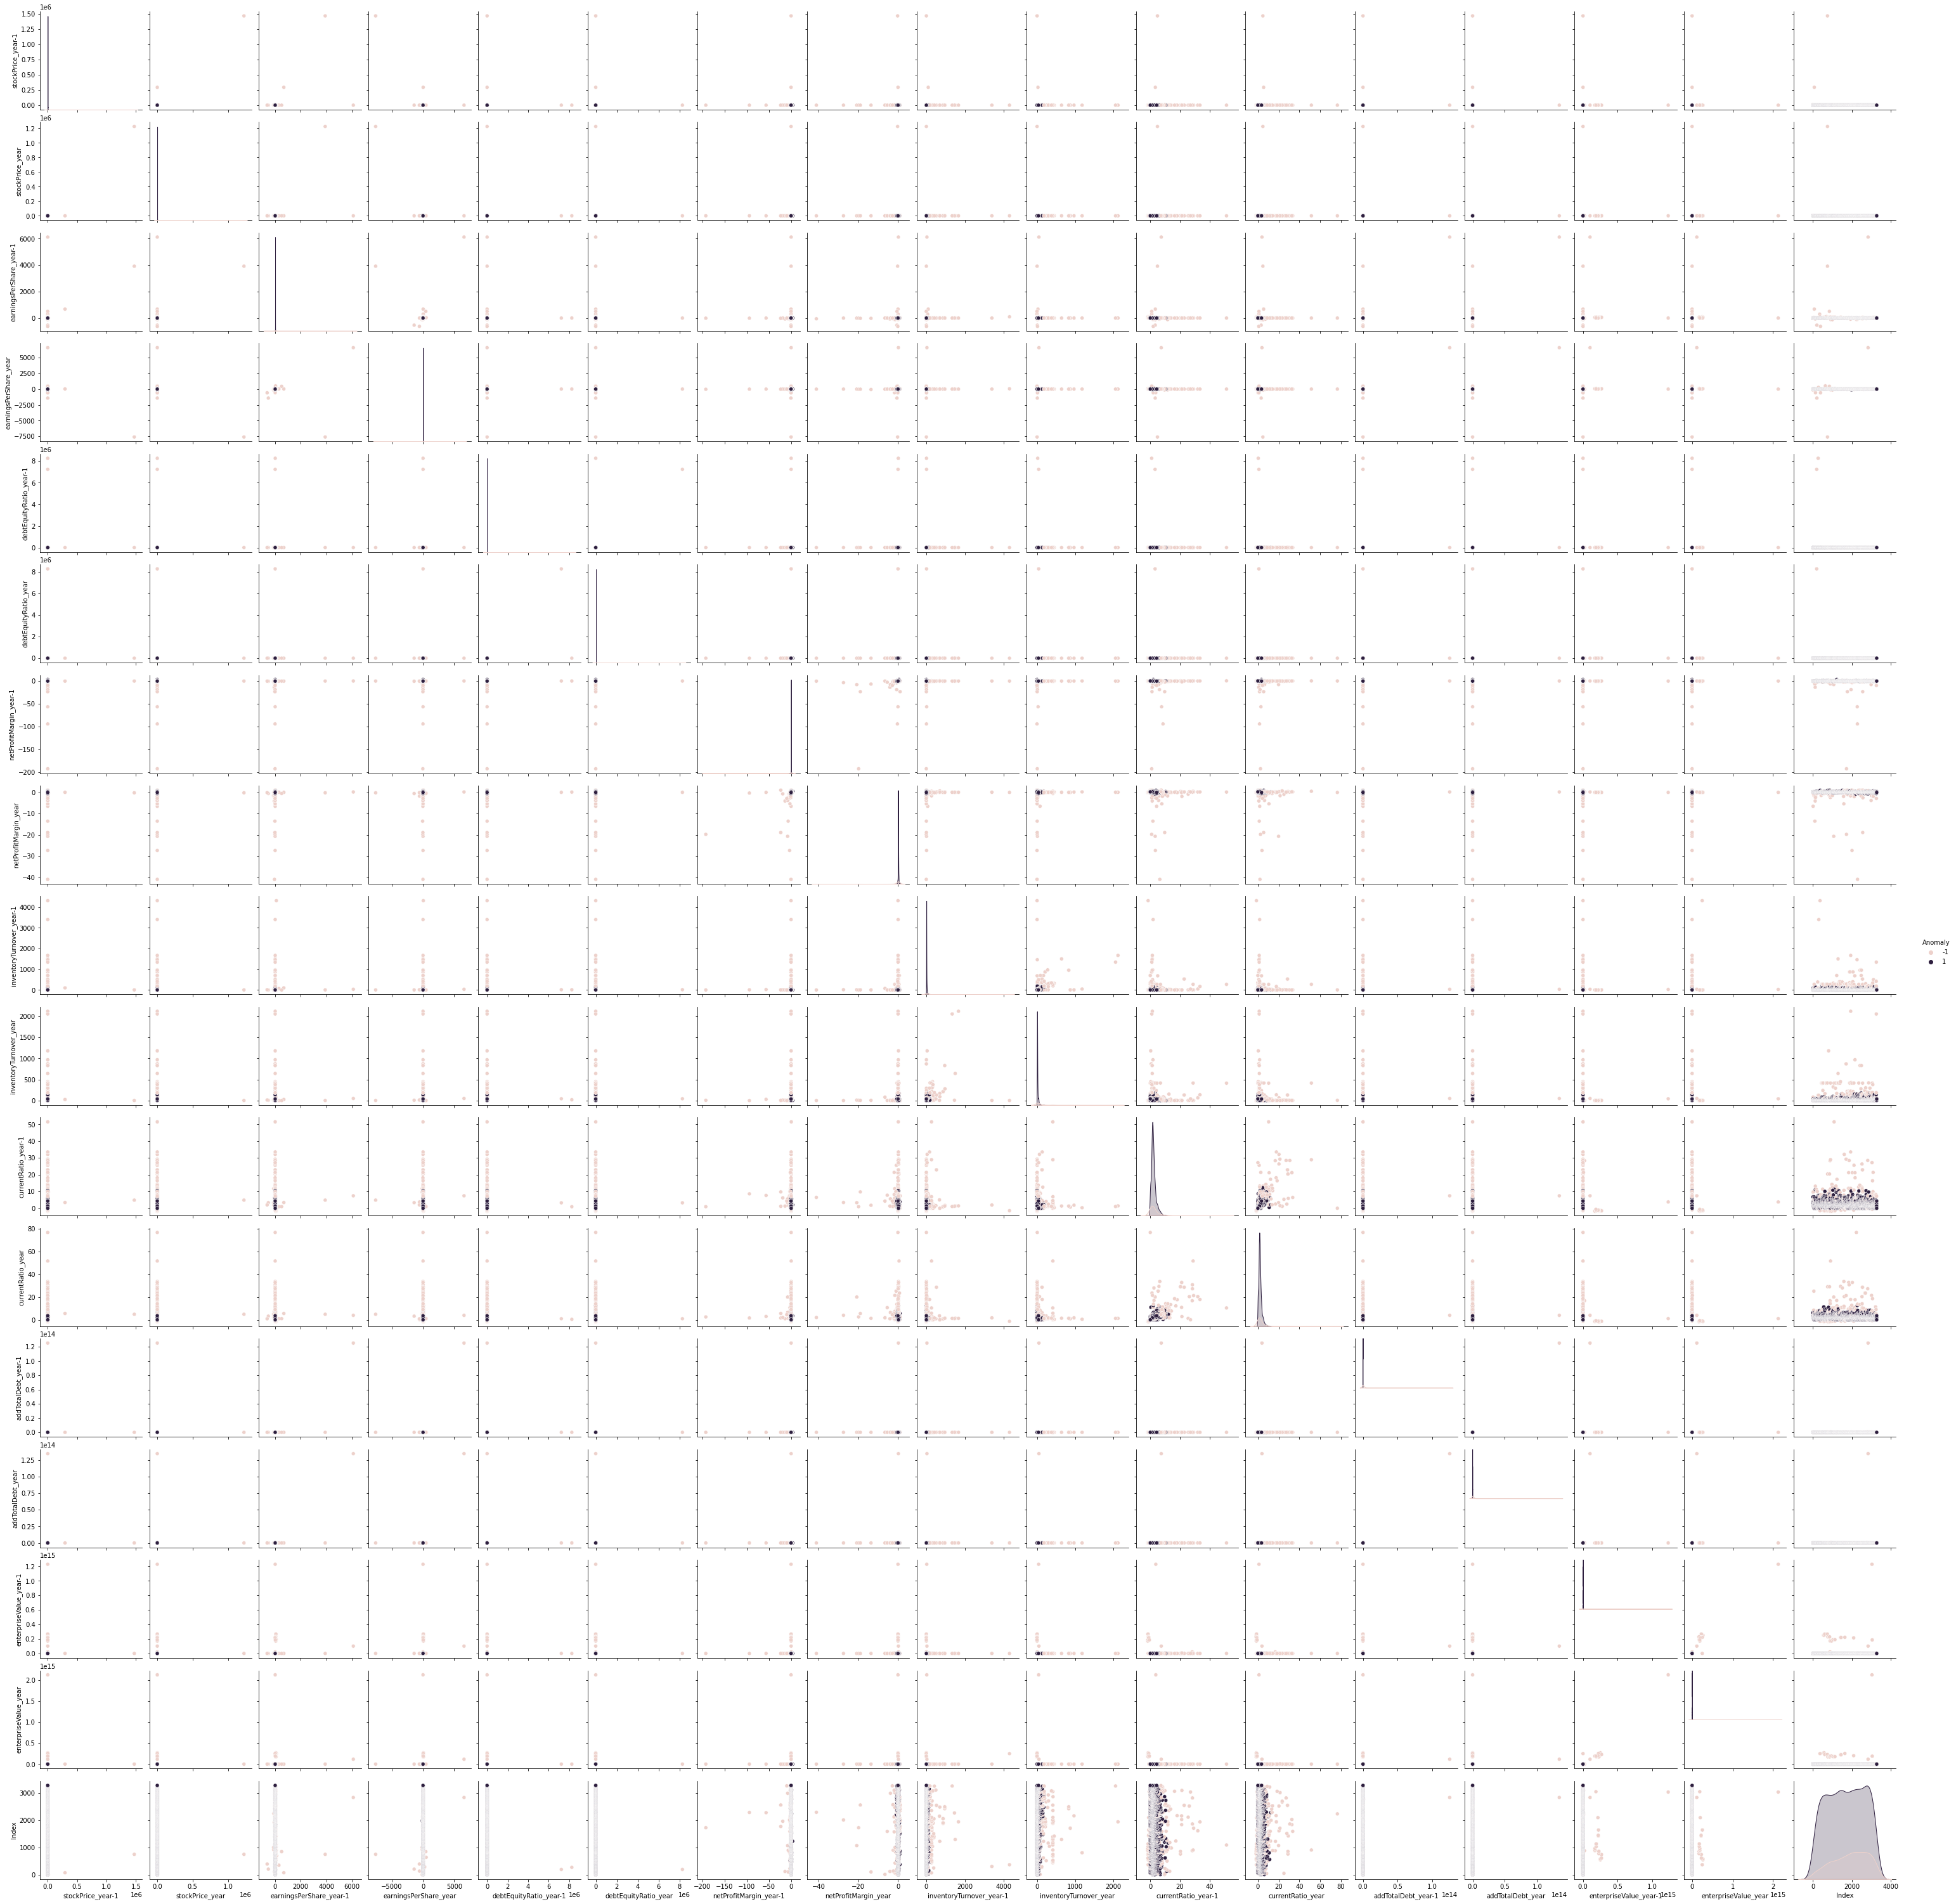

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
show = dataexp2
sns.pairplot(dataexp2, vars=dataexp2[['stockPrice_year-1','stockPrice_year','earningsPerShare_year-1','earningsPerShare_year','debtEquityRatio_year-1','debtEquityRatio_year','netProfitMargin_year-1','netProfitMargin_year','inventoryTurnover_year-1','inventoryTurnover_year','currentRatio_year-1','currentRatio_year','addTotalDebt_year-1','addTotalDebt_year','enterpriseValue_year-1','enterpriseValue_year','Index']], hue= "Anomaly")

Text(0, 0.5, 'Current Ratio Year -1')

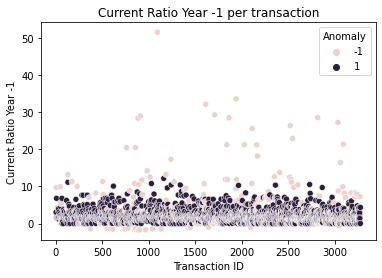

In [ ]:
sns.scatterplot(data=dataexp2, x='Index', y='currentRatio_year-1',hue='Anomaly') 
plt.title('Current Ratio Year -1 per transaction')  
plt.xlabel('Transaction ID')  
plt.ylabel('Current Ratio Year -1')  

Text(0, 0.5, 'Current Ratio Year ')

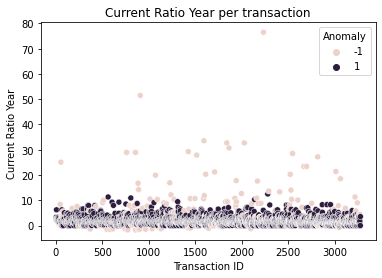

In [ ]:
sns.scatterplot(data=dataexp2, x='Index', y='currentRatio_year',hue='Anomaly') 
plt.title('Current Ratio Year per transaction')  
plt.xlabel('Transaction ID')  
plt.ylabel('Current Ratio Year ')  

Text(0, 0.5, 'addTotal Debt year-1')

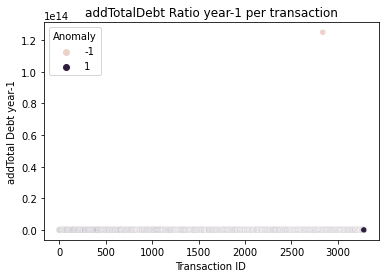

In [ ]:
sns.scatterplot(data=dataexp2, x='Index', y='addTotalDebt_year-1',hue='Anomaly') 
plt.title('addTotalDebt Ratio year-1 per transaction')  
plt.xlabel('Transaction ID ')  
plt.ylabel('addTotal Debt year-1')  

Text(0, 0.5, 'addTotal Debt year')

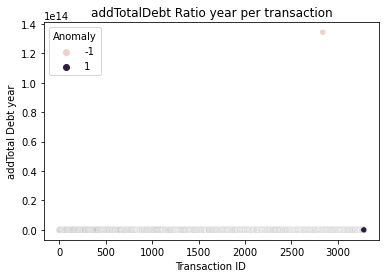

In [ ]:
sns.scatterplot(data=dataexp2, x='Index', y='addTotalDebt_year',hue='Anomaly') 
plt.title('addTotalDebt Ratio year per transaction')  
plt.xlabel('Transaction ID ')  
plt.ylabel('addTotal Debt year') 

Text(0, 0.5, 'enterpriseValue year -1')

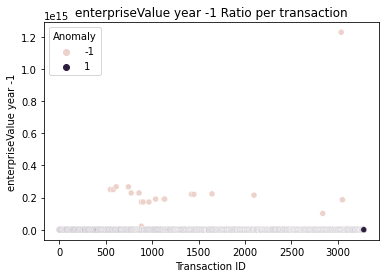

In [ ]:
sns.scatterplot(data=dataexp2, x='Index', y='enterpriseValue_year-1',hue='Anomaly') 
plt.title('enterpriseValue year -1 Ratio per transaction')  
plt.xlabel('Transaction ID ')  
plt.ylabel('enterpriseValue year -1')  

Text(0, 0.5, 'enterpriseValue')

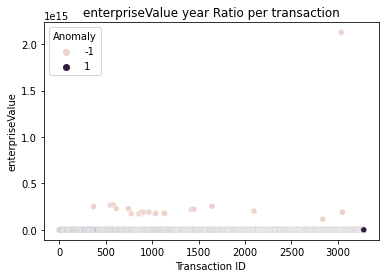

In [ ]:
sns.scatterplot(data=dataexp2, x='Index', y='enterpriseValue_year',hue='Anomaly') 
plt.title('enterpriseValue year Ratio per transaction')  
plt.xlabel('Transaction ID ')  
plt.ylabel('enterpriseValue')  

Text(0, 0.5, 'Stock Price year-1')

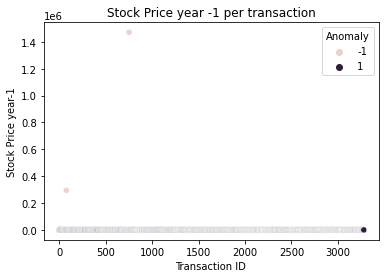

In [ ]:
sns.scatterplot(data=dataexp2, x='Index', y='stockPrice_year-1',hue='Anomaly') 
plt.title('Stock Price year -1 per transaction')  
plt.xlabel('Transaction ID ')  
plt.ylabel('Stock Price year-1')  

Text(0, 0.5, 'Stock Price year')

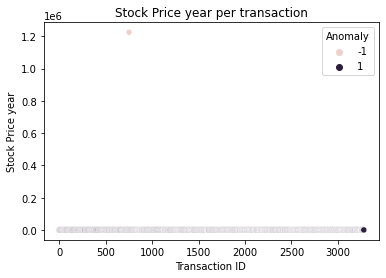

In [ ]:
sns.scatterplot(data=dataexp2, x='Index', y='stockPrice_year',hue='Anomaly') 
plt.title('Stock Price year per transaction')  
plt.xlabel('Transaction ID ')  
plt.ylabel('Stock Price year')  

Text(0, 0.5, 'Earnings Per Share year-1')

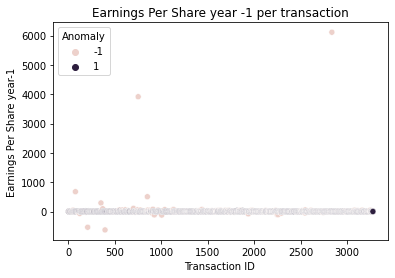

In [ ]:
sns.scatterplot(data=dataexp2, x='Index', y='earningsPerShare_year-1',hue='Anomaly') 
plt.title('Earnings Per Share year -1 per transaction')  
plt.xlabel('Transaction ID ')  
plt.ylabel('Earnings Per Share year-1')  

Text(0, 0.5, 'Earnings Per Share year')

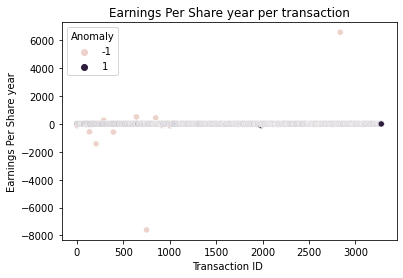

In [ ]:
sns.scatterplot(data=dataexp2, x='Index', y='earningsPerShare_year',hue='Anomaly') 
plt.title('Earnings Per Share year per transaction')  
plt.xlabel('Transaction ID ')  
plt.ylabel('Earnings Per Share year')  

Text(0, 0.5, 'Debt Equity Ratio year-1')

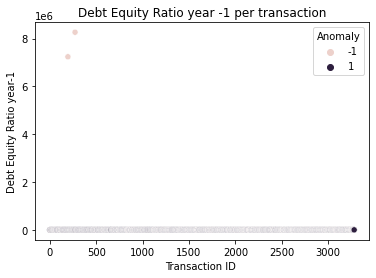

In [ ]:
sns.scatterplot(data=dataexp2, x='Index', y='debtEquityRatio_year-1',hue='Anomaly') 
plt.title('Debt Equity Ratio year -1 per transaction')  
plt.xlabel('Transaction ID ')  
plt.ylabel('Debt Equity Ratio year-1')  

Text(0, 0.5, 'Debt Equity Ratio year')

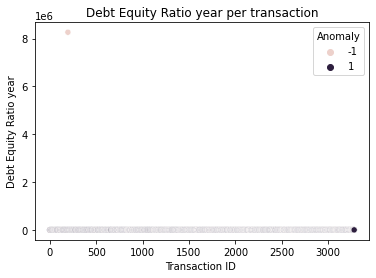

In [ ]:
sns.scatterplot(data=dataexp2, x='Index', y='debtEquityRatio_year',hue='Anomaly') 
plt.title('Debt Equity Ratio year per transaction')  
plt.xlabel('Transaction ID ')  
plt.ylabel('Debt Equity Ratio year')  

Text(0, 0.5, 'Inventory Turnover year-1')

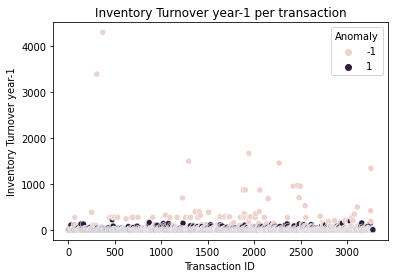

In [ ]:
sns.scatterplot(data=dataexp2, x='Index', y='inventoryTurnover_year-1',hue='Anomaly') 
plt.title('Inventory Turnover year-1 per transaction')  
plt.xlabel('Transaction ID ')  
plt.ylabel('Inventory Turnover year-1')  

Text(0, 0.5, 'Inventory Turnover year')

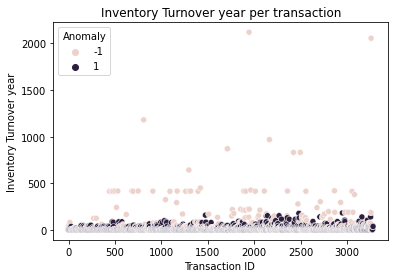

In [ ]:
sns.scatterplot(data=dataexp2, x='Index', y='inventoryTurnover_year',hue='Anomaly') 
plt.title('Inventory Turnover year per transaction')  
plt.xlabel('Transaction ID ')  
plt.ylabel('Inventory Turnover year') 

#Now, let's get rid of the extreme outliers for better visualization

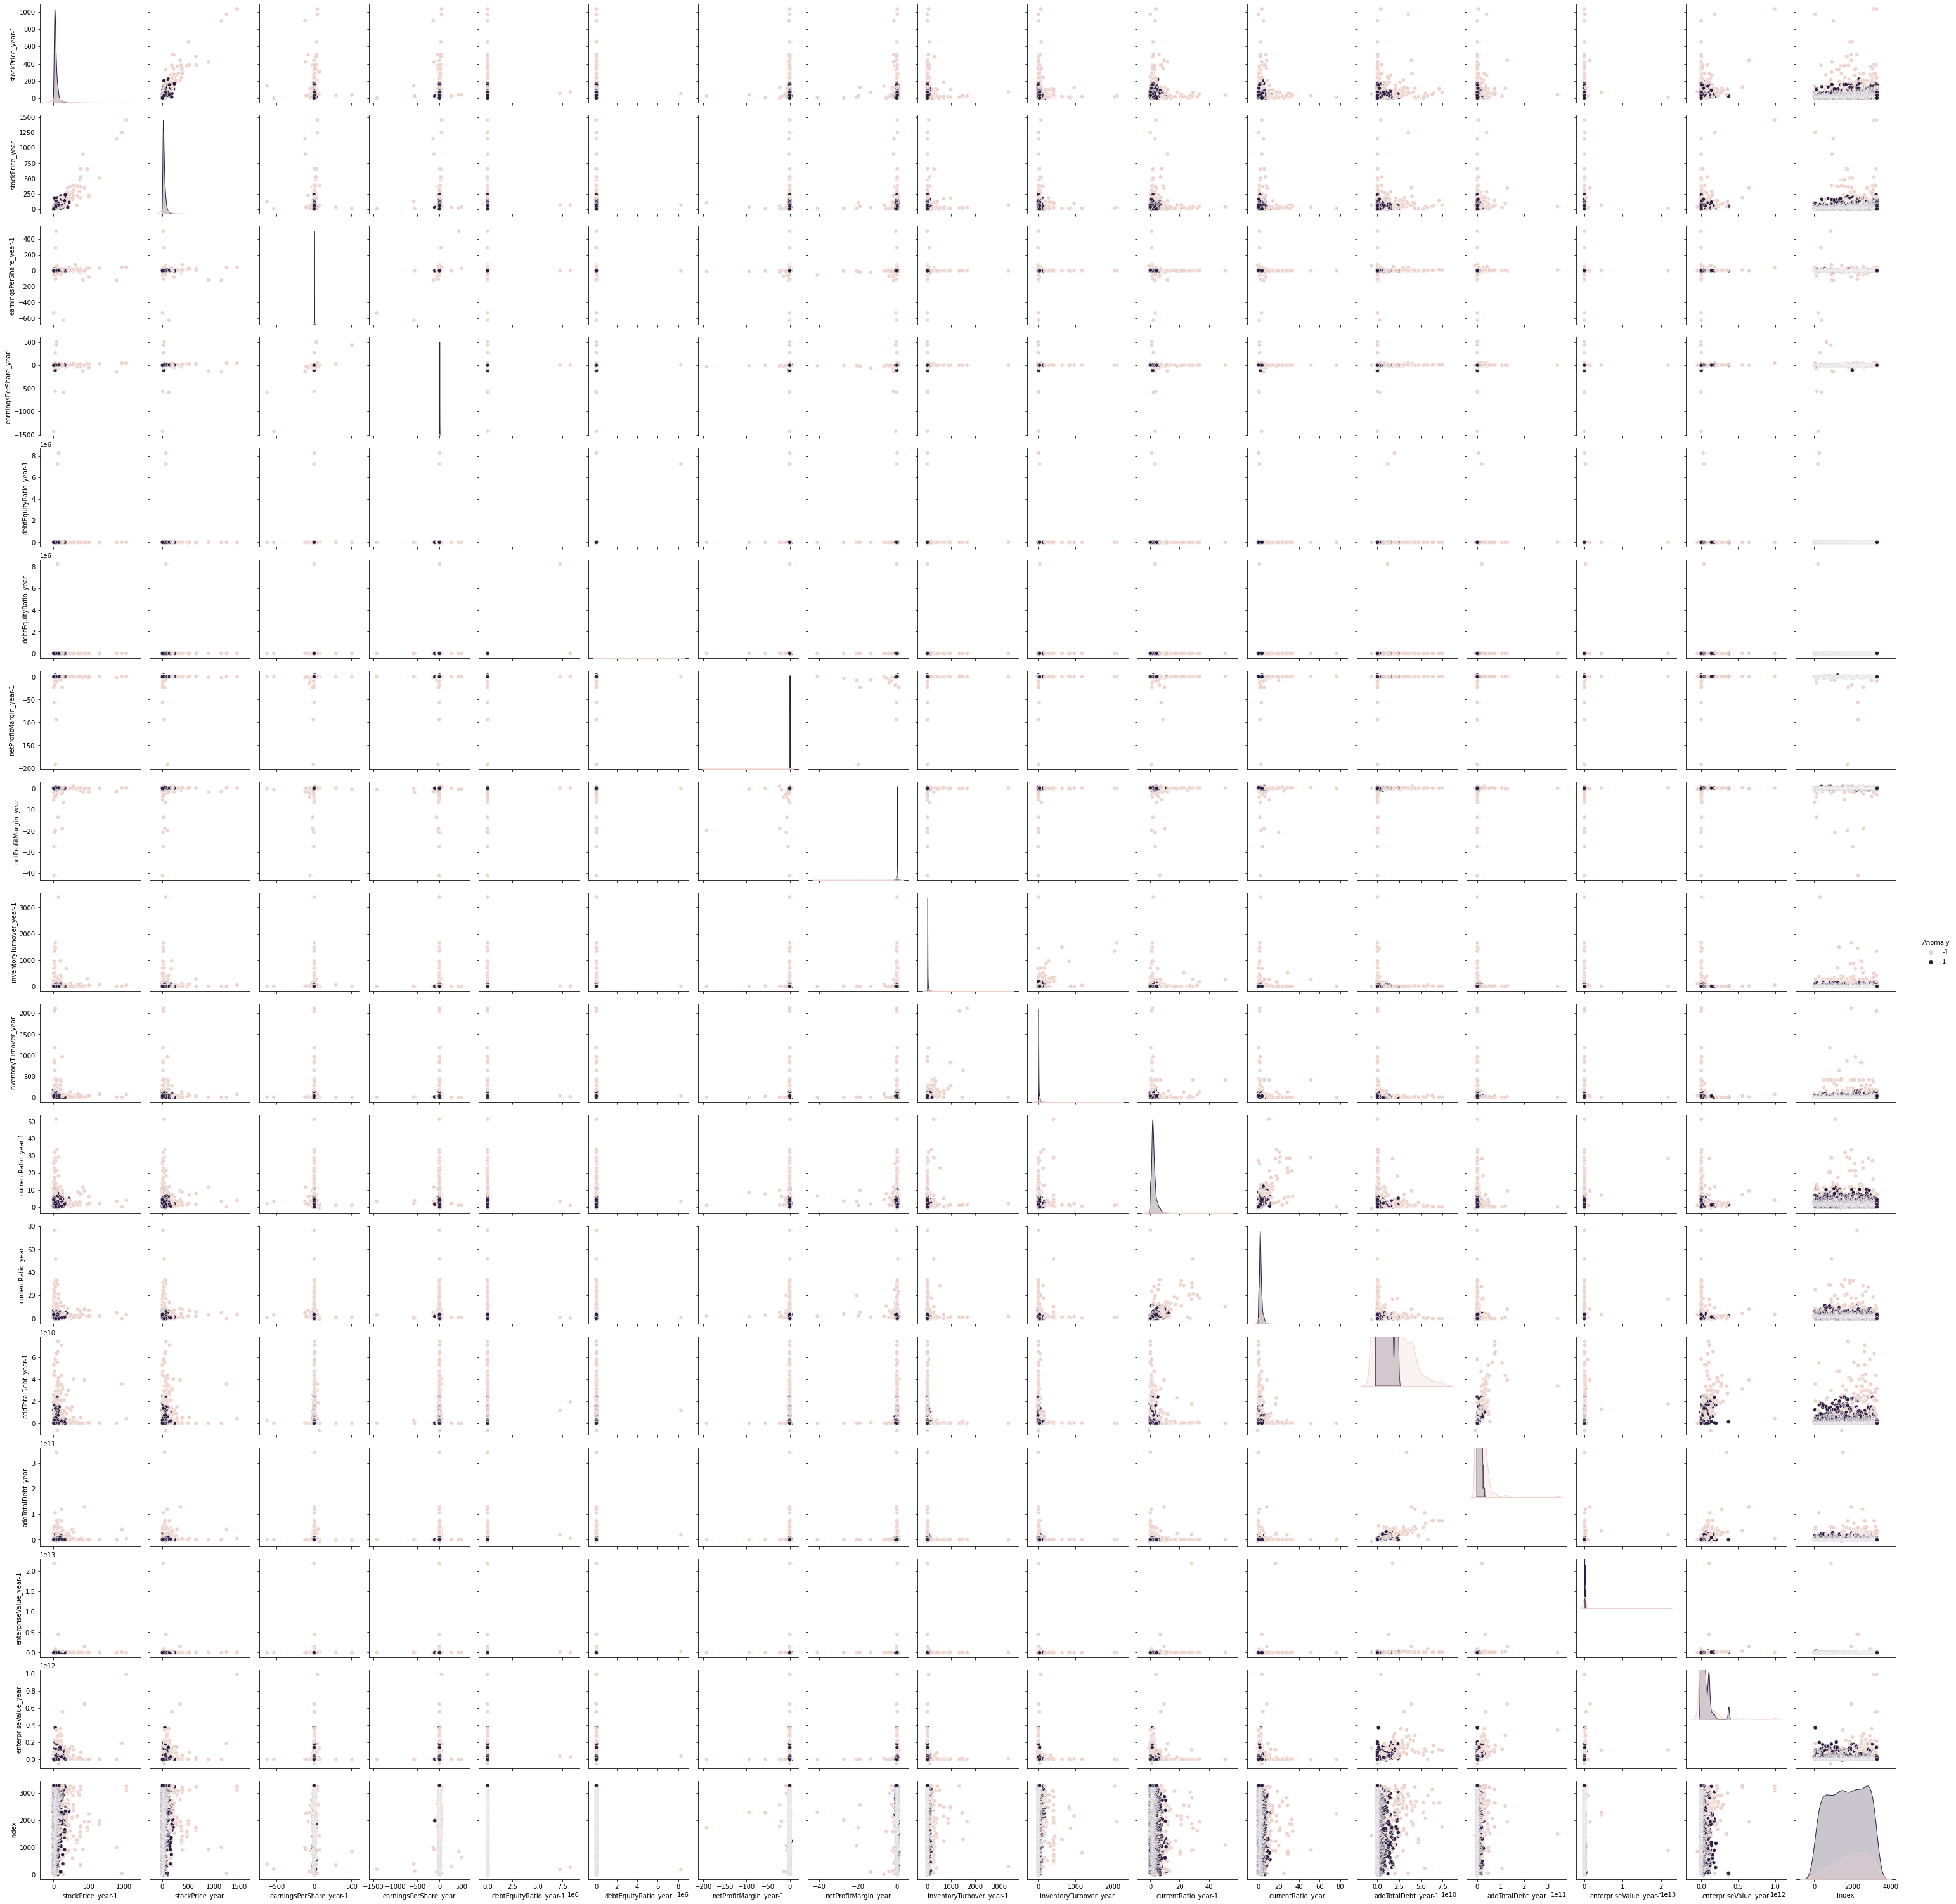

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
show = dataexp2
sns.pairplot(dataexp2, vars=dataexp2[['stockPrice_year-1','stockPrice_year','earningsPerShare_year-1','earningsPerShare_year','debtEquityRatio_year-1','debtEquityRatio_year','netProfitMargin_year-1','netProfitMargin_year','inventoryTurnover_year-1','inventoryTurnover_year','currentRatio_year-1','currentRatio_year','addTotalDebt_year-1','addTotalDebt_year','enterpriseValue_year-1','enterpriseValue_year','Index']], hue= "Anomaly")

Text(0, 0.5, 'Current Ratio Year -1')

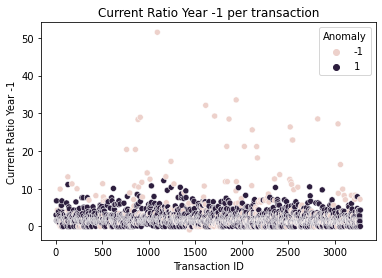

In [ ]:
#dataexp.scatterplot(x='currentRatio_year-1', y='currentRatio_year', style='o',cmap='magma') 
sns.scatterplot(data=dataexp2, x='Index', y='currentRatio_year-1',hue='Anomaly') 
plt.title('Current Ratio Year -1 per transaction')  
plt.xlabel('Transaction ID')  
plt.ylabel('Current Ratio Year -1')  

Text(0, 0.5, 'Current Ratio Year ')

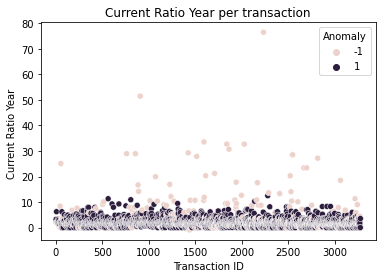

In [ ]:
sns.scatterplot(data=dataexp2, x='Index', y='currentRatio_year',hue='Anomaly') 
plt.title('Current Ratio Year per transaction')  
plt.xlabel('Transaction ID')  
plt.ylabel('Current Ratio Year ')  

Text(0, 0.5, 'addTotal Debt year-1')

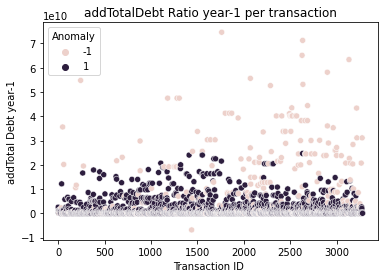

In [ ]:
#dataexp.scatterplot(x='currentRatio_year-1', y='currentRatio_year', style='o',cmap='magma') 
sns.scatterplot(data=dataexp2, x='Index', y='addTotalDebt_year-1',hue='Anomaly') 
plt.title('addTotalDebt Ratio year-1 per transaction')  
plt.xlabel('Transaction ID ')  
plt.ylabel('addTotal Debt year-1')  

Text(0, 0.5, 'addTotal Debt year')

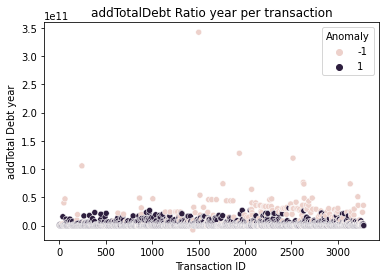

In [ ]:
sns.scatterplot(data=dataexp2, x='Index', y='addTotalDebt_year',hue='Anomaly') 
plt.title('addTotalDebt Ratio year per transaction')  
plt.xlabel('Transaction ID ')  
plt.ylabel('addTotal Debt year') 

Text(0, 0.5, 'enterpriseValue year -1')

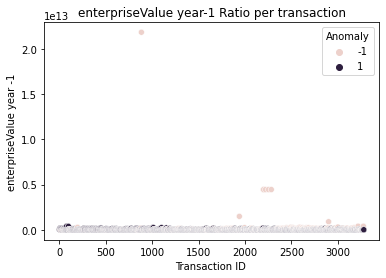

In [ ]:
sns.scatterplot(data=dataexp2, x='Index', y='enterpriseValue_year-1',hue='Anomaly') 
plt.title('enterpriseValue year-1 Ratio per transaction')  
plt.xlabel('Transaction ID ')  
plt.ylabel('enterpriseValue year -1')  

Text(0, 0.5, 'enterpriseValue year')

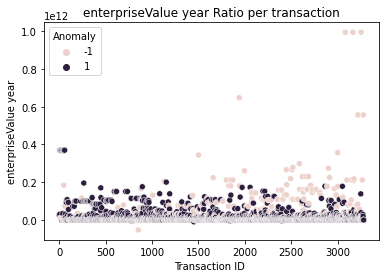

In [ ]:
 
sns.scatterplot(data=dataexp2, x='Index', y='enterpriseValue_year',hue='Anomaly') 
plt.title('enterpriseValue year Ratio per transaction')  
plt.xlabel('Transaction ID')  
plt.ylabel('enterpriseValue year')  

Text(0, 0.5, 'Stock Price year-1')

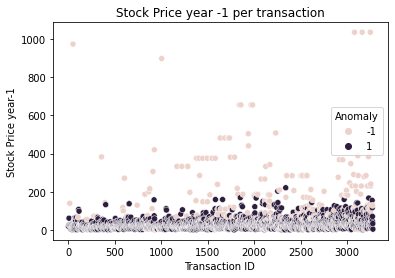

In [ ]:

sns.scatterplot(data=dataexp2, x='Index', y='stockPrice_year-1',hue='Anomaly') 
plt.title('Stock Price year -1 per transaction')  
plt.xlabel('Transaction ID ')  
plt.ylabel('Stock Price year-1')  

Text(0, 0.5, 'Stock Price year')

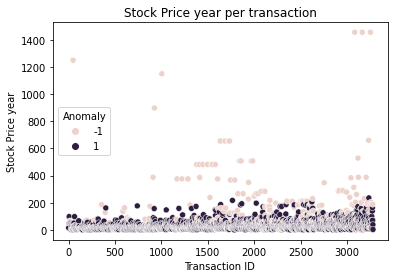

In [ ]:
sns.scatterplot(data=dataexp2, x='Index', y='stockPrice_year',hue='Anomaly') 
plt.title('Stock Price year per transaction')  
plt.xlabel('Transaction ID ')  
plt.ylabel('Stock Price year')  

Text(0, 0.5, 'Debt Equity Ratio year-1')

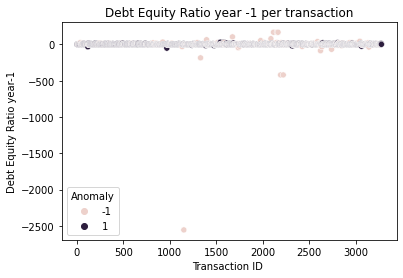

In [ ]:
sns.scatterplot(data=dataexp2, x='Index', y='debtEquityRatio_year-1',hue='Anomaly') 
plt.title('Debt Equity Ratio year -1 per transaction')  
plt.xlabel('Transaction ID ')  
plt.ylabel('Debt Equity Ratio year-1')  

Text(0, 0.5, 'Debt Equity Ratio year')

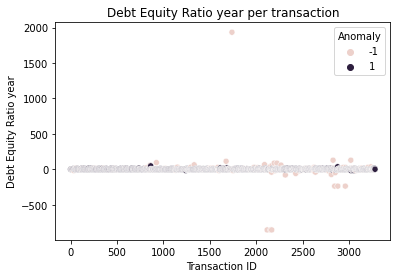

In [ ]:
sns.scatterplot(data=dataexp2, x='Index', y='debtEquityRatio_year',hue='Anomaly') 
plt.title('Debt Equity Ratio year per transaction')  
plt.xlabel('Transaction ID ')  
plt.ylabel('Debt Equity Ratio year')  

Text(0, 0.5, 'Inventory Turnover year-1')

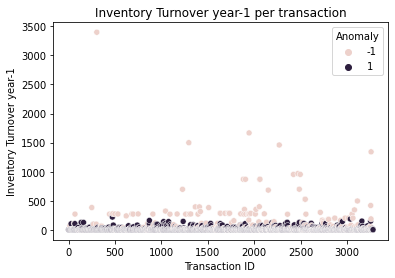

In [ ]:
sns.scatterplot(data=dataexp2, x='Index', y='inventoryTurnover_year-1',hue='Anomaly') 
plt.title('Inventory Turnover year-1 per transaction')  
plt.xlabel('Transaction ID ')  
plt.ylabel('Inventory Turnover year-1')  

Text(0, 0.5, 'Inventory Turnover year')

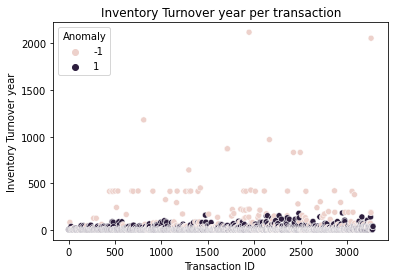

In [ ]:
sns.scatterplot(data=dataexp2, x='Index', y='inventoryTurnover_year',hue='Anomaly') 
plt.title('Inventory Turnover year per transaction')  
plt.xlabel('Transaction ID ')  
plt.ylabel('Inventory Turnover year')  

#Now, let's see what happends the year after the M&A Transaction

Text(0, 0.5, 'Current Ratio Year +1')

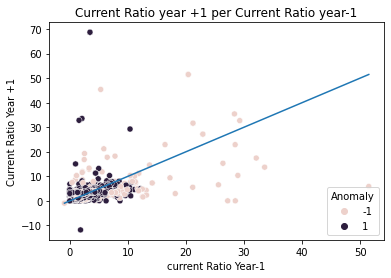

In [ ]:
sns.lineplot(data=dataexp2, x="currentRatio_year-1", y="currentRatio_year-1")
sns.scatterplot(data=dataexp2, x='currentRatio_year-1', y='currentRatio_year+1',hue='Anomaly') 
plt.title('Current Ratio year +1 per Current Ratio year-1')  
plt.xlabel('current Ratio Year-1')  
plt.ylabel('Current Ratio Year +1')   

Text(0, 0.5, 'Current Ratio Year +1')

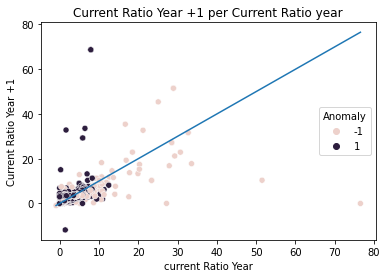

In [ ]:
sns.lineplot(data=dataexp2, x="currentRatio_year", y="currentRatio_year")
sns.scatterplot(data=dataexp2, x='currentRatio_year', y='currentRatio_year+1',hue='Anomaly') 
plt.title('Current Ratio Year +1 per Current Ratio year')  
plt.xlabel('current Ratio Year')  
plt.ylabel('Current Ratio Year +1')  

Text(0, 0.5, 'addTotal Debt year +1')

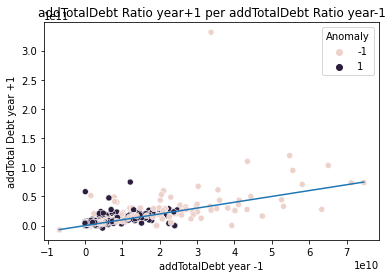

In [ ]:
sns.lineplot(data=dataexp2, x='addTotalDebt_year-1', y='addTotalDebt_year-1')
sns.scatterplot(data=dataexp2, x='addTotalDebt_year-1', y='addTotalDebt_year+1',hue='Anomaly') 
plt.title('addTotalDebt Ratio year+1 per addTotalDebt Ratio year-1')  
plt.xlabel('addTotalDebt year -1')  
plt.ylabel('addTotal Debt year +1')  

Text(0, 0.5, 'addTotal Debt year+1')

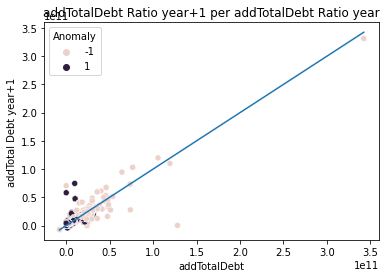

In [ ]:
sns.lineplot(data=dataexp2, x='addTotalDebt_year', y='addTotalDebt_year')
sns.scatterplot(data=dataexp2, x='addTotalDebt_year', y='addTotalDebt_year+1',hue='Anomaly') 
plt.title('addTotalDebt Ratio year+1 per addTotalDebt Ratio year')  
plt.xlabel('addTotalDebt')  
plt.ylabel('addTotal Debt year+1')  

Text(0, 0.5, 'Enterprise Value year +1')

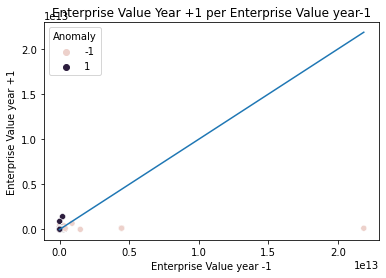

In [ ]:
sns.lineplot(data=dataexp2, x="enterpriseValue_year-1", y="enterpriseValue_year-1")
sns.scatterplot(data=dataexp2, x='enterpriseValue_year-1', y='enterpriseValue_year+1',hue='Anomaly') 
plt.title('Enterprise Value Year +1 per Enterprise Value year-1')  
plt.xlabel('Enterprise Value year -1')  
plt.ylabel('Enterprise Value year +1')  

Text(0, 0.5, 'Enterprise Value year +1')

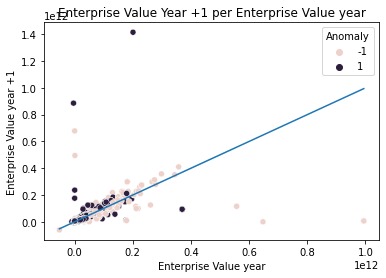

In [ ]:
sns.lineplot(data=dataexp2, x="enterpriseValue_year", y="enterpriseValue_year")
sns.scatterplot(data=dataexp2, x='enterpriseValue_year', y='enterpriseValue_year+1',hue='Anomaly') 
plt.title('Enterprise Value Year +1 per Enterprise Value year')  
plt.xlabel('Enterprise Value year')  
plt.ylabel('Enterprise Value year +1') 

Text(0, 0.5, 'Stock Price year +1')

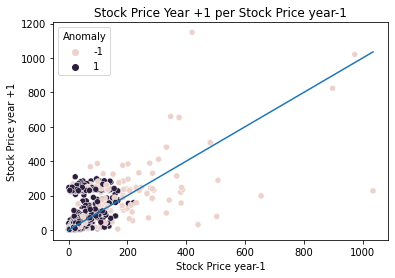

In [ ]:
sns.lineplot(data=dataexp2, x="stockPrice_year-1", y="stockPrice_year-1")
sns.scatterplot(data=dataexp2, x='stockPrice_year-1', y='stockPrice_year+1',hue='Anomaly') 
plt.title('Stock Price Year +1 per Stock Price year-1')  
plt.xlabel('Stock Price year-1')  
plt.ylabel('Stock Price year +1') 

Text(0, 0.5, 'Stock Price year +1')

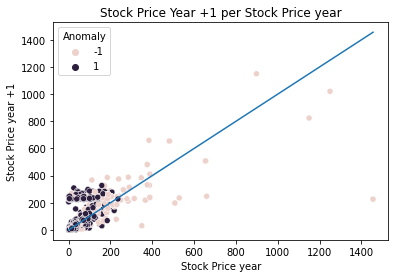

In [ ]:
sns.lineplot(data=dataexp2, x="stockPrice_year", y="stockPrice_year")
sns.scatterplot(data=dataexp2, x='stockPrice_year', y='stockPrice_year+1',hue='Anomaly') 
plt.title('Stock Price Year +1 per Stock Price year')  
plt.xlabel('Stock Price year')  
plt.ylabel('Stock Price year +1') 

Text(0, 0.5, 'Debt Equity Ratio year +1')

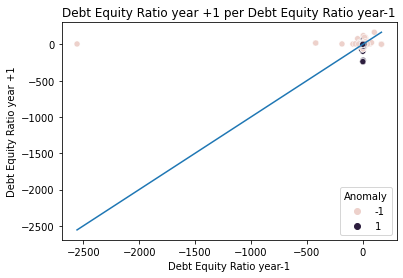

In [ ]:
sns.lineplot(data=dataexp2, x="debtEquityRatio_year-1", y="debtEquityRatio_year-1")
sns.scatterplot(data=dataexp2, x='debtEquityRatio_year-1', y='debtEquityRatio_year+1',hue='Anomaly') 
plt.title('Debt Equity Ratio year +1 per Debt Equity Ratio year-1')  
plt.xlabel('Debt Equity Ratio year-1')  
plt.ylabel('Debt Equity Ratio year +1') 

Text(0, 0.5, 'Debt Equity Ratio year +1')

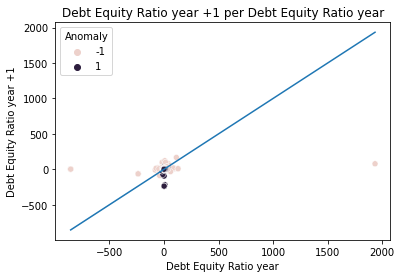

In [ ]:
sns.lineplot(data=dataexp2, x="debtEquityRatio_year", y="debtEquityRatio_year")
sns.scatterplot(data=dataexp2, x='debtEquityRatio_year', y='debtEquityRatio_year+1',hue='Anomaly') 
plt.title('Debt Equity Ratio year +1 per Debt Equity Ratio year')  
plt.xlabel('Debt Equity Ratio year')  
plt.ylabel('Debt Equity Ratio year +1') 

Text(0, 0.5, 'Debt Equity Ratio year +1')

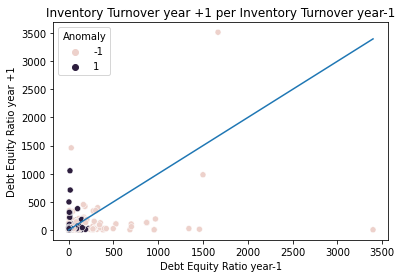

In [ ]:
sns.lineplot(data=dataexp2, x="inventoryTurnover_year-1", y="inventoryTurnover_year-1")
sns.scatterplot(data=dataexp2, x='inventoryTurnover_year-1', y='inventoryTurnover_year+1',hue='Anomaly') 
plt.title('Inventory Turnover year +1 per Inventory Turnover year-1')  
plt.xlabel('Debt Equity Ratio year-1')  
plt.ylabel('Debt Equity Ratio year +1') 

Text(0, 0.5, 'Debt Equity Ratio year +1')

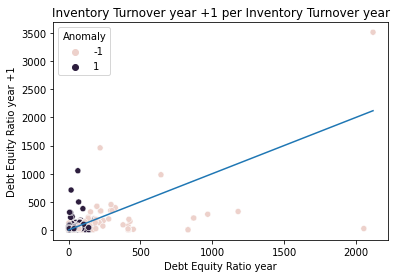

In [ ]:
sns.lineplot(data=dataexp2, x="inventoryTurnover_year", y="inventoryTurnover_year")
sns.scatterplot(data=dataexp2, x='inventoryTurnover_year', y='inventoryTurnover_year+1',hue='Anomaly') 
plt.title('Inventory Turnover year +1 per Inventory Turnover year')  
plt.xlabel('Debt Equity Ratio year') 
plt.ylabel('Debt Equity Ratio year +1') 

#Generating The Anomaly-Only Dataset

In [ ]:
dft2=dataexp2.loc[dataexp2['Anomaly']==-1]

*Generating the scores column*

In [ ]:
dft2['Rates']=50+abs(dft2['scores'])*100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dft2.shape

(530, 4437)

In [ ]:
dft2['Rates']

1       71.966399
6       58.559995
19      53.108447
21      74.375244
25      57.001636
          ...    
2633    65.854642
2635    53.312221
2637    59.733699
2639    51.289939
2648    61.718889
Name: Rates, Length: 530, dtype: float64

In [ ]:
dft2.head(25)
dft2.shape

In [ ]:
ids=dft2.index

In [ ]:
ids2=dataexp2.index

In [ ]:
dfid2 = pd.DataFrame(dataexp,index=ids2)
dfid2['Anomaly']=dataexp2['Anomaly']
dfid2['scores']=dataexp2['scores']
dfid2['Rates']=50+abs(dfid2['scores'])*100

In [ ]:
len(ids2)


2607

In [ ]:
dfid = pd.DataFrame(dataexp,index=ids)
dfid.head(10)

,Unnamed: 0,Index,Date,Target,Sector,Country,Transaction Type,Deal Value,Inv,stockPrice_year-1,stockPrice_year,stockPrice_year+1,earningsPerShare_year-1,earningsPerShare_year,earningsPerShare_year+1,debtEquityRatio_year-1,debtEquityRatio_year,debtEquityRatio_year+1,netProfitMargin_year-1,netProfitMargin_year,netProfitMargin_year+1,inventoryTurnover_year-1,inventoryTurnover_year,inventoryTurnover_year+1,currentRatio_year-1,currentRatio_year,currentRatio_year+1,addTotalDebt_year-1,addTotalDebt_year,addTotalDebt_year+1,enterpriseValue_year-1,enterpriseValue_year,enterpriseValue_year+1,Anomaly
1,1,1,2000.0,"Etec Systems, Inc.",Semiconductors,United States,Add-on Acquisition,1800.0,"Applied Materials, Inc., 3050 Bowers Avenue, P...",18.4289,15.5327,15.8760,0.497500,1.20140,0.29971,0.546488,0.484375,0.292099,0.153670,0.215809,0.069182,4.010273,3.130984,2.895258,3.031329,3.202536,5.076321,2.521600e+09,6.680000e+08,5.650000e+08,2.937062e+10,2.570518e+10,2.611882e+10,-1.0
2,2,2,2000.0,"Sirius XM Holdings, Inc.",Media,United States,Stake Purchase,1591.0,"The Blackstone Group Inc. (PE), 345 Park Avenu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
6,6,6,2000.0,Pacific Advantage International Ltd.,Marketing,United States,Add-on Acquisition,4.0,"Juniper Networks, Inc., 1133 Innovation Way, S...",61.3887,98.0803,14.3844,-0.016667,0.49000,-0.04000,0.121695,1.880991,1.395892,-0.087719,0.219623,-0.015126,NaN,NaN,NaN,6.782765,6.231503,4.648884,1.879000e+08,1.738457e+09,1.532797e+09,3.489659e+10,3.102923e+10,5.520013e+09,-1.0
15,15,15,2000.0,Axtel S. A. B. De CV,Communications,Mexico,"Buyout (LBO, MBO, MBI)",600.0,"The Blackstone Group Inc. (PE), 345 Park Avenu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
19,19,19,2000.0,Development Subsidiary - Seagull Semiconductors,Semiconductors,Israel,Divestiture,19.0,"Cisco Systems, Inc., 170 West Tasman Drive, Sa...",25.3934,50.2637,13.7029,0.325000,0.35870,-0.14091,0.257150,0.240518,0.299336,0.172454,0.140955,-0.045485,6.503067,5.475649,6.663302,1.536797,2.138183,1.585351,1.189000e+09,0.000000e+00,0.000000e+00,1.635400e+11,3.696274e+11,9.373307e+10,-1.0
21,21,21,2000.0,ReliaStar Financial Corp.,Insurance,United States,Add-on Acquisition,6100.0,"ING Groep N.V., Amsterdamse Poort, Bijlmerplei...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
25,25,25,2000.0,PhoneFree.com,Communications,United States,Venture,121.0,"The Blackstone Group Inc. (PE), 345 Park Avenu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
32,32,32,2000.0,National Grid USA - Ocean State Power (OSP) P...,Utilities,United States,Divestiture,61.0,"TC Energy Corporation, 450 - 1 Street SW, Calg...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
35,35,35,2000.0,The Pillsbury Company LLC,Food,United States,Divestiture,10500.0,"General Mills, Inc. , Number 1 General Mills B...",7.5232,7.9956,9.2589,0.850560,0.99837,1.13870,24.250000,-16.826990,96.903846,0.085655,0.091642,0.093953,6.074941,5.279843,5.473988,0.648824,0.470542,0.637392,2.226000e+09,2.846000e+09,3.079000e+09,6.954093e+09,7.737294e+09,8.422198e+09,-1.0
39,39,39,2000.0,"iPCS, Inc.",Communications,United States,Stake Purchase,330.0,"The Blackstone Group Inc. (PE), 345 Park Avenu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0


In [ ]:
dfid.value_counts()

#File Exports

In [ ]:
dfid.to_csv("AnomaliesDetected30Pct_LogicallyClustered_Hackathon2.csv", index=False)
dataexp2.to_csv("AnomaliesDetected30Pct_LogicallyClustered_RemovedOutliers.csv")

In [ ]:
dfid2.to_csv("AnomaliesDetected30Pct_LogicallyClustered_RemovedOutliers.csv")